In [13]:
import glob,os
import librosa as rs
import numpy as np
from matplotlib import cm

import matplotlib.pyplot as plt   
import IPython.display as ipd

In [17]:
def spec2plot(data,n_fft=512,normalized=True):
    n_shape = len(data.shape)

    # [ l ] -> wav
    if n_shape == 1 :
        data = rs.stft(data,n_fft = n_fft)
        mag= np.abs(data)
    # [2, F, T] -> spec
    elif data.shape[0] == 2 :
        data = data[0] + data[1]*1j
        mag = np.abs(data)
    # or [F, T] with complex
    elif np.iscomplex(data).any() : 
        mag = np.abs(data)
    else : 
        mag = data
    # data is mag

    np.seterr(divide = 'warn') 

    mag = 10*np.log(mag)
    fig, ax = plt.subplots()
    im = plt.imshow(mag, cmap=cm.jet, aspect='auto',origin='lower')
    plt.colorbar(im)
    plt.clim(-80,20)
    
    plt.xlabel('Time')
    plt.ylabel('Freq')
    
    plt.show()


(29390,)


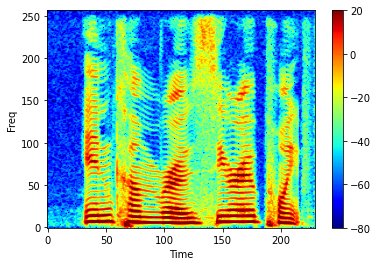

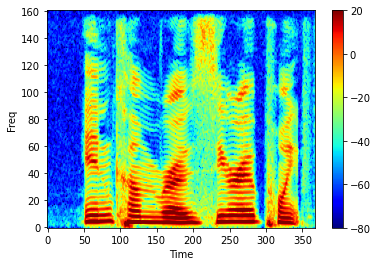

In [19]:
x = rs.load("data/female_1.wav",sr=16000)[0]
print(x.shape)
spec2plot(x)
spec2plot(x,n_fft=320)

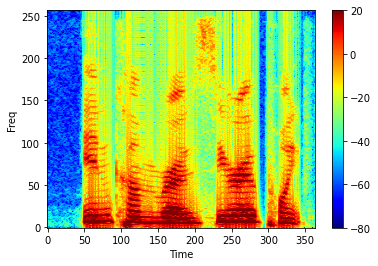

In [26]:
n_sample = len(x)
n_hop = 80
n_fft = 320

spec = []
idx_sample = 0

while idx_sample+n_fft < n_sample : 
    chunk = x[idx_sample:idx_sample+n_fft]
    chunk = np.pad(chunk, (0, 512-n_fft), 'constant', constant_values=(0, 0))
    spec_chunk = np.fft.rfft(chunk)
    spec.append(spec_chunk)
    idx_sample += n_hop
spec = np.array(spec)
spec.shape

mag= np.abs(spec)
mag = 10*np.log(mag.T)

plt.figure
im = plt.imshow(mag, cmap=cm.jet, aspect='auto',origin='lower')
plt.colorbar(im)
plt.clim(-80,20)
plt.xlabel('Time')
plt.ylabel('Freq')
plt.show()